
<img src="bike.jpg">

Communal bike sharing facilities can be found in many American cities, where you can rent bicycles by the hour or day. One of these cities is Washington, D.C. The District keeps track of how many bicycles individuals rent by the hour and by the day.

We'll aim to predict the total number of bikes rented in an hour in this project. Except for **casual** and **registered** columns, we'll use all of the other values to anticipate the overall number of rentals (**cnt** column). To do so, we'll build a few different machine learning models and assess how well they work.


## Data Description

Hadi Fanaee-T at the University of Porto compiled this data into a CSV file, which we'll be working with in this project. The file contains 17380 rows, with each row representing the number of bike rentals for a single hour of a single day. You can download the data from the University of California, Irvine's website.
Here are the descriptions for the relevant columns:

Here are the descriptions for the relevant columns:

- instant - A unique sequential ID number for each row

- dteday - The date of the rentals

- season - The season in which the rentals occurred

- yr - The year the rentals occurred

- mnth - The month the rentals occurred

- hr - The hour the rentals occurred

- holiday - Whether or not the day was a holiday

- weekday - The day of the week (as a number, 0 to 7)

- workingday - Whether or not the day was a working day

- weathersit - The weather (as a categorical variable)

- temp - The temperature, on a 0-1 scale

- atemp - The adjusted temperature

- hum - The humidity, on a 0-1 scale

- windspeed - The wind speed, on a 0-1 scale

- casual - The number of casual riders (people who hadn't previously signed up with the bike sharing program)

- registered - The number of registered riders (people who had already signed up)

- cnt - The total number of bike rentals (casual + registered)


In [13]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
%matplotlib inline

In [14]:
bike_rentals=pd.read_csv('bike_rental_hour.csv')
bike_rentals.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


 We'll create a histogram of the cnt column of bike_rentals, and take a look at the distribution of total rentals:

(array([6972., 3705., 2659., 1660.,  987.,  663.,  369.,  188.,  139.,
          37.]),
 array([  1. ,  98.6, 196.2, 293.8, 391.4, 489. , 586.6, 684.2, 781.8,
        879.4, 977. ]),
 <BarContainer object of 10 artists>)

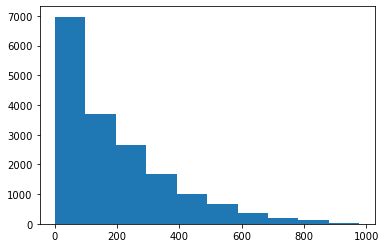

In [15]:
plt.hist(bike_rentals['cnt'])

The correlation of each variable with 'cnt' is as follows.

<AxesSubplot:>

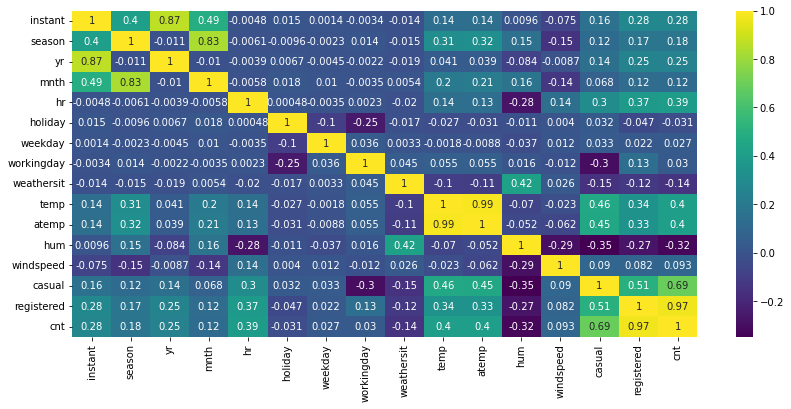

In [16]:
plt.figure(figsize=(14,6))

sns.heatmap(bike_rentals.corr(),annot=True,cmap='viridis')

## Feature Creation

It can often be helpful to calculate features before applying machine learning models. Features can enhance the accuracy of models by introducing new information, or distilling existing information.

For example, the **hr** column in **bike_rentals** contains the hours during which bikes are rented, from **1** to **24**.
We can introduce some order into the process by creating a new column with labels for **morning**, **afternoon**, **evening**, and **night**. This will bundle similar times together, enabling the model to make better decisions.


Steps:

Write a function called assign_label that takes in a numeric value for an hour, and returns:
- if the hour is from 6 to 12
- if the hour is from 12 to 18
- if the hour is from 18 to 24
- if the hour is from 0 to 6
- Use the apply method on series objects to apply the function to each item in the hr column.
- Assign the result to the time_label column of bike_rentals.

In [17]:
def assign_label(hour):
    if hour >=0 and hour <6:
        return 4
    elif hour >=6 and hour <12:
        return 1
    elif hour >=12 and hour<18:
        return 2
    elif hour >=18 and hour <=24:
        return 3
    

## Train - Test - Split
Before we begin applying machine learning algorithms, we'll need to split the data into training and testing sets.

This will enable us to train an algorithm using the training set, and evaluate its accuracy on the testing set.

If we train an algorithm on the training data, then evaluate its performance on the same data, we can get an unrealistically low error value, due to overfitting.



- Based on our explorations of the cnt column, we'll pick an error metric for evaluating the performance of the machine learning algorithms.

#### Mean Squared Error

The mean squared error metric makes the most sense to evaluate our error.

MSE works on continuous numeric data, which fits our data quite well.

In [18]:
bike_rentals['time_label']=bike_rentals['hr'].apply(assign_label)

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
bike_rentals.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,time_label
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16,4
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40,4
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32,4
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13,4
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1,4


## Applying the Linear Regression model

Now that we've done some exploration and manipulation, we're ready to apply linear regression to the data. Linear regression will probably work fairly well on this data, given that many of the columns are highly correlated with cnt.

We'll need to ignore the **casual** and **registered** columns because **cnt** is derived from them.

Steps:

- Create a list of predictor columns to use in training and predictions.
- exclude the **cnt**, **casual**, **dteday**, and **registered** columns, and other columns not useful for the predictions.
- Use the LinearRegression class from sklearn to train a machine learning algorithm on train.
- Use only the columns in the list of predictors for this.
- Make predictions using the LinearRegression class on test.
- Use the exact same predictor columns here.
- Calculate the error between the predictions and the actual values.

In [21]:
X=bike_rentals.drop(['casual','registered','cnt','dteday'],axis=1)
y=bike_rentals['cnt']


X_train, X_test, y_train, y_test = train_test_split(
 X, y, test_size=0.2)

In [22]:
linear=LinearRegression()
linear.fit(X_train,y_train)

LinearRegression()

In [23]:
predic=linear.predict(X_test)

In [24]:
predic

array([189.80537506, 199.05579075, 299.12287322, ..., 280.4677328 ,
       175.94931491, 255.39316497])

In [25]:
mse=mean_squared_error(y_test,predic)


### MSE in LR model
The error is very high, which may be due to the fact that the data has a few extremely high rental counts, but otherwise mostly low counts.

Larger errors are penalized more with MSE, which leads to a higher total error.

# Applying the Decision Tree Model
We'll now apply the decision tree algorithm. we'll be able to compare its error with the error from linear regression, which will enable us to pick the right algorithm for this data set.

Steps:

- Use the DecisionTreeRegressor class to fit a decision tree algorithm to the train data.
- Make predictions using the DecisionTreeRegressor class on test.
- Calculate the error between the predictions and the actual values.
- Experiment with various parameters of the DecisionTreeRegressor class, including min_samples_leaf, to see if it changes the error.

In [26]:
tree=DecisionTreeRegressor(min_samples_leaf=7)
tree.fit(X_train,y_train)

DecisionTreeRegressor(min_samples_leaf=7)

In [27]:
pred=tree.predict(X_test)

In [28]:
mean_squared_error(y_test,pred)

2931.009939073254

### MSE in Decision Tree
The decision tree regressor appears to have much higher accuracy than linear regression as it takes into account the nonlinear predictors.

# Applying the Random Forests model

We'll now apply the decision tree algorithm. we'll be able to compare its error with the error from linear regression, which will enable us to pick the right algorithm for this data set.

Steps:

- Use the **DecisionTreeRegressor** class to fit a decision tree algorithm to the train data.
- Make predictions using the **DecisionTreeRegressor** class on **test**.
- Calculate the error between the predictions and the actual values.
- Experiment with various parameters of the **DecisionTreeRegressor** class, including **min_samples_leaf**, to see if it changes the error.

In [29]:
forest=RandomForestRegressor(min_samples_leaf=10)
forest.fit(X_train,y_train)

RandomForestRegressor(min_samples_leaf=10)

In [30]:
predictions=forest.predict(X_test)

In [31]:
predictions

array([ 97.3341417 , 270.30216534, 180.31662682, ..., 270.68398667,
       102.71665137, 200.57470992])

In [32]:
mean_squared_error(y_test,predictions)

2254.945964652224

### MSE in Random Forests
Removing some sources of overfitting helps improve MSE in Random Forests